In [1]:
####importing os and setting wd
import os
os.chdir("C:\\Users\\USER\\Desktop\\project\\employee absentism\\python")
os.getcwd()

'C:\\Users\\USER\\Desktop\\project\\employee absentism\\python'

In [2]:
####importing file and converting to dataframe
import pandas as pd
os.listdir('.')
xl=pd.ExcelFile('Absenteeism_at_work_Project.xls')
xl.sheet_names
data=xl.parse('Absenteeism_at_work')
data=pd.DataFrame(data)
data.shape
data.describe()
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [3]:
##removing sapces from column names
data.columns
data.columns=data.columns.str.strip().str.replace(' ','_')
data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [4]:
##checking for nulls
data.isnull().sum()

ID                                  0
Reason_for_absence                  3
Month_of_absence                    1
Day_of_the_week                     0
Seasons                             0
Transportation_expense              7
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 3
Work_load_Average/day              10
Hit_target                          6
Disciplinary_failure                6
Education                          10
Son                                 6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body_mass_index                    31
Absenteeism_time_in_hours          22
dtype: int64

In [5]:
###dropping invalid values and replceing nulls to valid values wrto other values present for variables fro that ID
data=data[(data.Month_of_absence)>0]
data=data[(data.Absenteeism_time_in_hours)>0]
data.shape
data.isnull().sum()
(data.isnull().sum()/data.shape[0])*100
mis_col=['Transportation_expense','Distance_from_Residence_to_Work','Service_time','Age','Hit_target','Disciplinary_failure','Education','Son','Social_drinker','Social_smoker','Pet','Weight','Height','Body_mass_index']
#len(mis_col)
for i in data['ID'].unique():
    for j in mis_col:
        data.loc[((data['ID']==i) & (data[j].isna())),j]=data[(data.ID==i)][j].max()


In [6]:
###imputing NA for work_load by month
data.isnull().sum()
import matplotlib.pyplot as plt 
import seaborn as sn
from scipy import stats
plt.scatter(x='Month_of_absence', y='Work_load_Average/day',data=data)
for i in data['Month_of_absence'].unique():
    mode=stats.mode(data[data['Month_of_absence']==i]['Work_load_Average/day'])[0][0]
    data.loc[((data['Month_of_absence']==i) & pd.isna(data['Work_load_Average/day'])),'Work_load_Average/day']=mode

In [7]:
####dropping nulls from reason of absence as it can't be imputed.
data.isnull().sum()
data=data.dropna(subset=['Reason_for_absence'])
data.isnull().sum()
data.shape
data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [8]:
####EDA
data_cat=['Day_of_the_week','Reason_for_absence','Month_of_absence','Seasons','Disciplinary_failure','Education','Son','Social_drinker','Social_smoker','Pet']
len(data_cat)
data_num=['ID','Transportation_expense', 'Distance_from_Residence_to_Work','Service_time','Age','Work_load_Average/day','Hit_target','Weight','Height','Body_mass_index']
len(data_num)
tgt=['Absenteeism_time_in_hours']
for i in data_cat:
    data[i]=data[i].astype("category")
data.dtypes   

ID                                    int64
Reason_for_absence                 category
Month_of_absence                   category
Day_of_the_week                    category
Seasons                            category
Transportation_expense              float64
Distance_from_Residence_to_Work     float64
Service_time                        float64
Age                                 float64
Work_load_Average/day               float64
Hit_target                          float64
Disciplinary_failure               category
Education                          category
Son                                category
Social_drinker                     category
Social_smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body_mass_index                     float64
Absenteeism_time_in_hours           float64
dtype: object

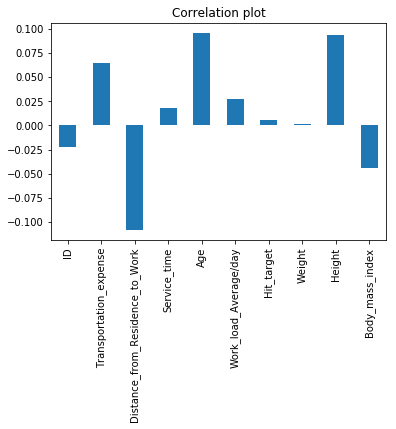

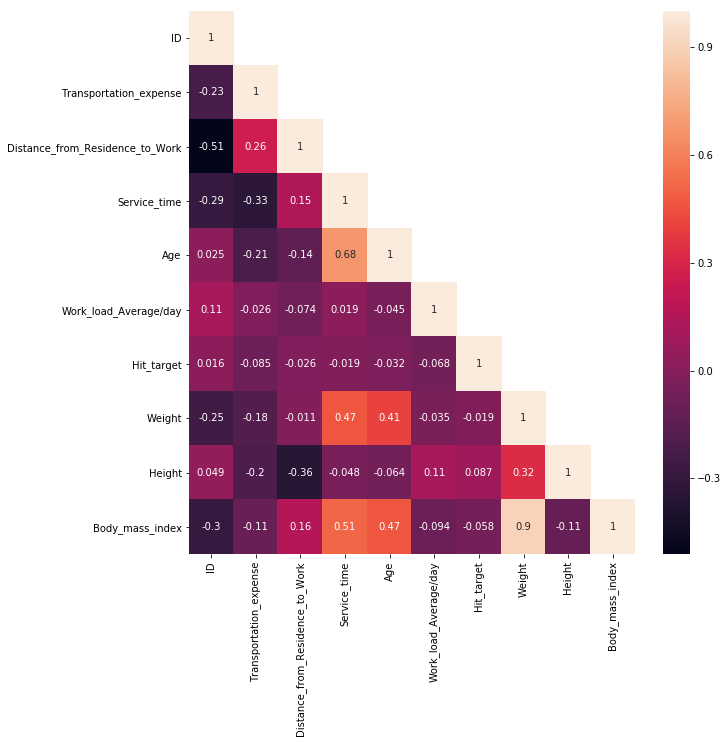

In [9]:
##lets us understand correlation beween continous variables:
import seaborn as sb
import matplotlib.pyplot as pt
import numpy as np
corr=data[data_num].corrwith(data.Absenteeism_time_in_hours)
corr.plot.bar(title='Correlation plot')
f,ax=pt.subplots(figsize=(10,10))
correMtr=data[data_num].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
sb.heatmap(correMtr,mask=mask,annot=True)
pt.show()


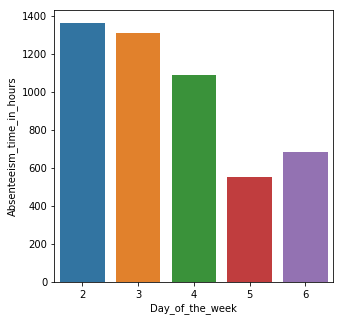

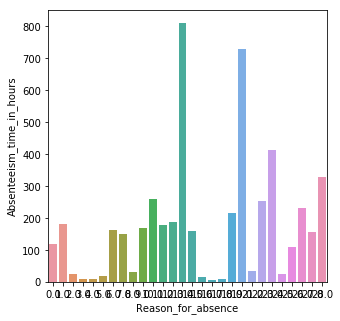

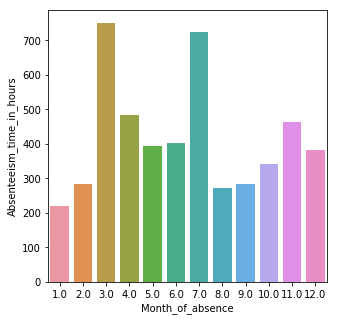

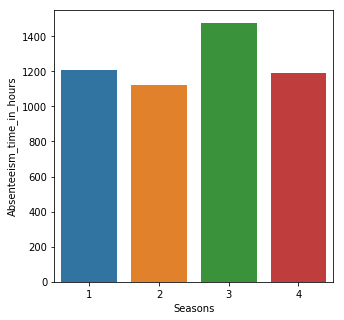

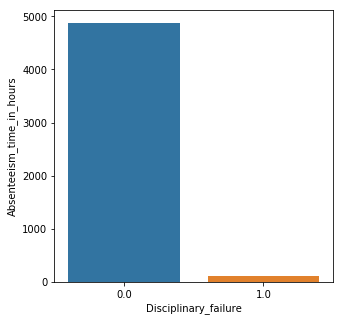

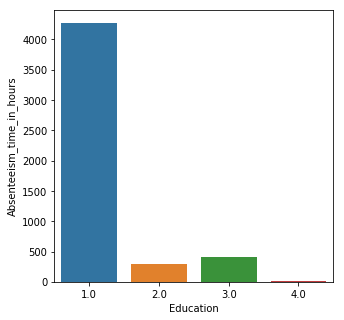

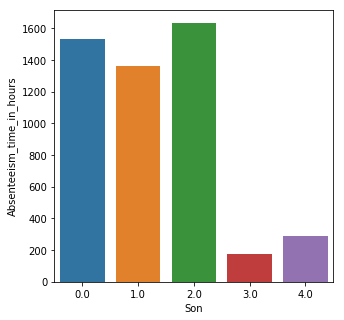

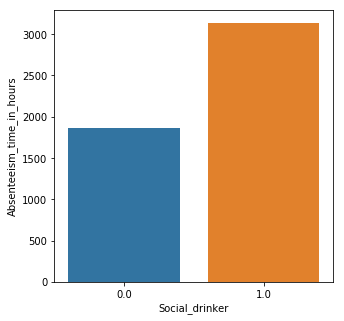

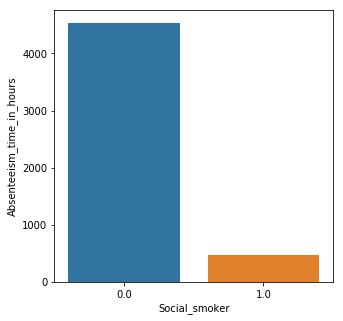

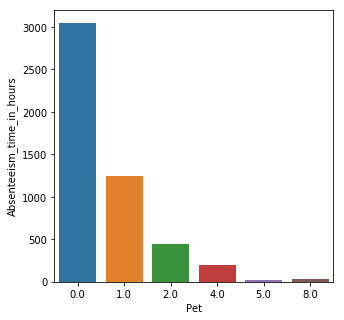

In [10]:
##let us understand relationship between categorical and target variable
for i in data_cat:
    f,ax=pt.subplots(figsize=(5,5))
    temp=data[[i,'Absenteeism_time_in_hours']].groupby(i).sum().sort_values('Absenteeism_time_in_hours').reset_index()
    sb.barplot(x=i,y='Absenteeism_time_in_hours',data=temp)
    pt.show()

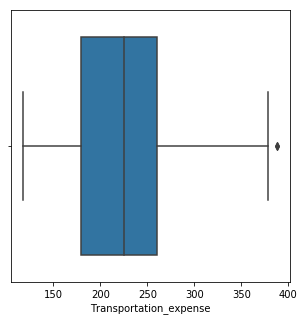

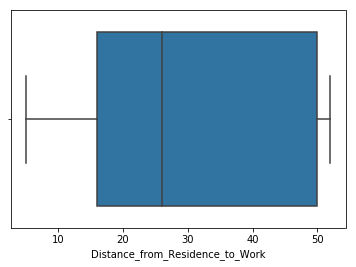

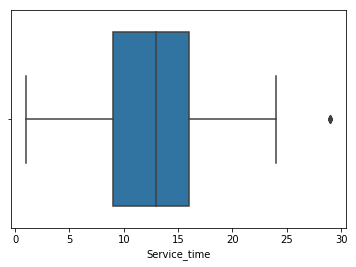

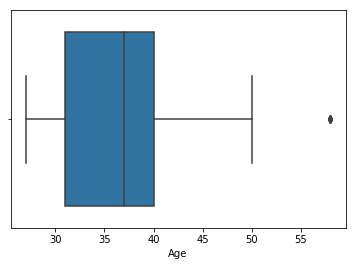

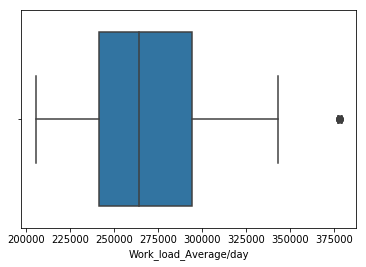

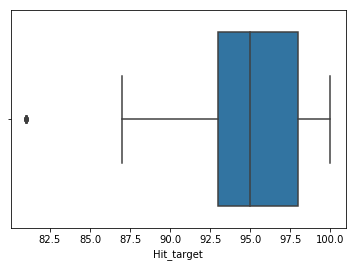

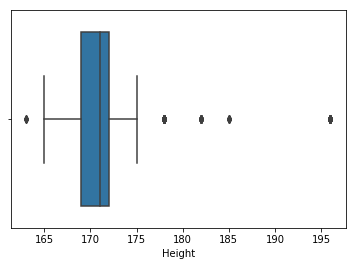

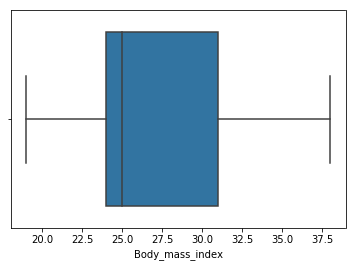

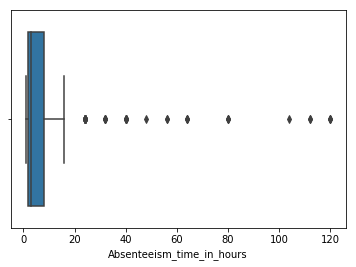

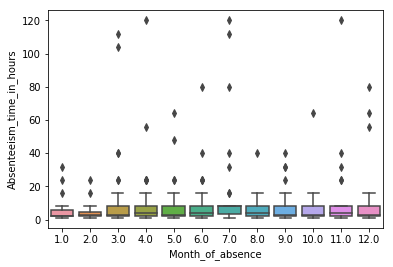

In [11]:
### Outlier analysis:
box=['Transportation_expense', 'Distance_from_Residence_to_Work','Service_time','Age','Work_load_Average/day','Hit_target','Height','Body_mass_index','Absenteeism_time_in_hours']
figure,ax=pt.subplots(figsize=(5,5))
for i in range(len(box)):
    sb.boxplot(x=box[i],data=data)
    pt.show()
sb.boxplot(x='Month_of_absence',y='Absenteeism_time_in_hours',data=data)

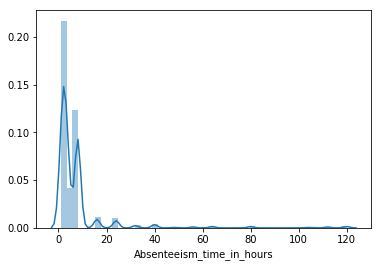

In [11]:
sb.distplot(data['Absenteeism_time_in_hours'],hist=True)
pt.show()

In [12]:
c=['Transportation_expense','Service_time','Age','Work_load_Average/day','Hit_target','Height','Absenteeism_time_in_hours']
df=pd.DataFrame(data,columns=c)
for i in c:
    q75,q25=np.percentile(df.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    df.loc[df.loc[:,i]<min,:i]=np.nan
    df.loc[df.loc[:,i]>max,:i]=np.nan
df.isnull().sum()
for i in c:
    df[i]=df[i].fillna(df[i].mean())
    data[i]=df[i]
df.isnull().sum()


Transportation_expense       0
Service_time                 0
Age                          0
Work_load_Average/day        0
Hit_target                   0
Height                       0
Absenteeism_time_in_hours    0
dtype: int64

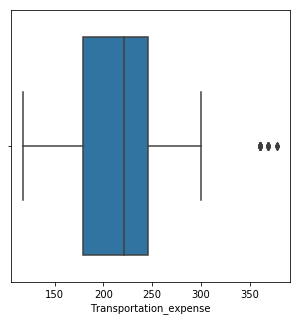

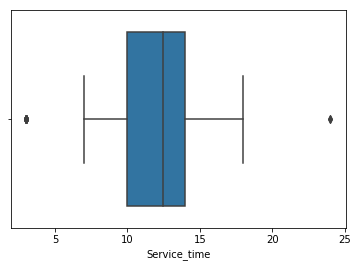

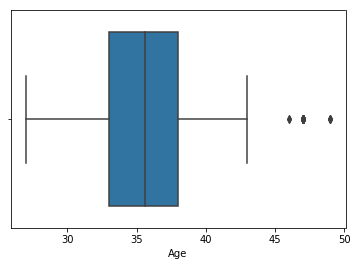

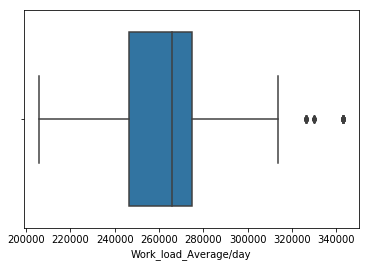

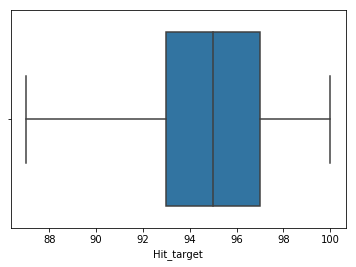

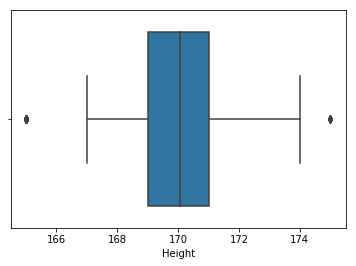

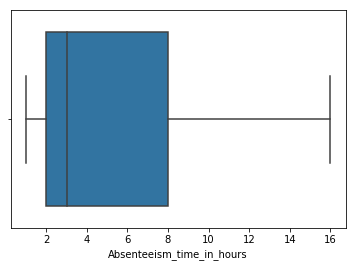

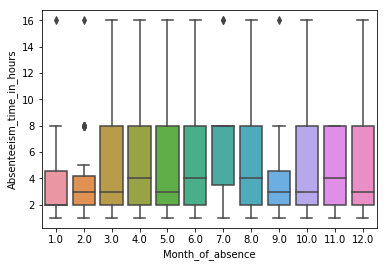

In [13]:
figure,ax=pt.subplots(figsize=(5,5))
for i in range(len(c)):
  sb.boxplot(x=c[i],data=data)
  pt.show()
sb.boxplot(x='Month_of_absence',y='Absenteeism_time_in_hours',data=data)



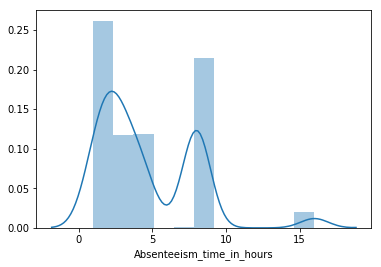

In [14]:
##checking normal distribution of target variable for regression model
sb.distplot(data['Absenteeism_time_in_hours'],hist=True)  ##not normally disributed


In [15]:
###feature extraction
data.columns
emp_num=data[['ID','Month_of_absence','Distance_from_Residence_to_Work','Service_time','Age','Work_load_Average/day','Height']].groupby(['ID','Month_of_absence']).max().reset_index()
emp_cat=data[['ID','Month_of_absence','Son','Social_drinker','Pet']].groupby(['ID','Month_of_absence']).max().reset_index()
emp_tgt=data[['ID','Month_of_absence','Absenteeism_time_in_hours']].groupby(['ID','Month_of_absence']).max().reset_index()
emp=emp_num.merge(emp_cat,how='inner',left_on=['ID','Month_of_absence'],right_on=['ID','Month_of_absence']).merge(emp_tgt,how='inner',left_on=['ID','Month_of_absence'],right_on=['ID','Month_of_absence'])
emp.columns


Index(['ID', 'Month_of_absence', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day', 'Height', 'Son',
       'Social_drinker', 'Pet', 'Absenteeism_time_in_hours'],
      dtype='object')

In [16]:
col=['Distance_from_Residence_to_Work','Service_time','Age','Work_load_Average/day','Height','Son','Social_drinker','Pet']
for i in emp['ID'].unique():
    for j in col:
        emp.loc[((emp['ID']==i) & (emp[j].isna())),j]=emp[(emp.ID==i)][j].max()
for i in emp['Month_of_absence'].unique():
    mode=stats.mode(emp[emp['Month_of_absence']==i]['Work_load_Average/day'])[0][0]
    emp.loc[((emp['Month_of_absence']==i) & pd.isna(emp['Work_load_Average/day'])),'Work_load_Average/day']=mode


In [17]:
emp.isna().any()
emp.Absenteeism_time_in_hours=emp.Absenteeism_time_in_hours.fillna(0)
emp.isna().any()

ID                                 False
Month_of_absence                   False
Distance_from_Residence_to_Work    False
Service_time                       False
Age                                False
Work_load_Average/day              False
Height                             False
Son                                False
Social_drinker                     False
Pet                                False
Absenteeism_time_in_hours          False
dtype: bool

In [18]:
emp.shape
emp.head()

,ID,Month_of_absence,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Height,Son,Social_drinker,Pet,Absenteeism_time_in_hours
0,1,1.0,11.0,14.0,37.0,330061.0,172.0,1.0,0.0,1.0,1.0
1,1,2.0,11.0,14.0,37.0,330061.0,172.0,1.0,0.0,1.0,0.0
2,1,3.0,11.0,14.0,37.0,244387.0,172.0,1.0,0.0,1.0,8.0
3,1,4.0,11.0,14.0,37.0,326452.0,172.0,1.0,0.0,1.0,8.0
4,1,5.0,11.0,14.0,37.0,246074.0,172.0,1.0,0.0,1.0,8.0


In [19]:
def Standardize_Values(df):
    df_new = df
    var = ['Distance_from_Residence_to_Work','Service_time','Age','Work_load_Average/day','Height']
    for i in var:
        df_new[i] = (np.max(df_new[i]) - df_new[i]) / (np.max(df_new[i]) - np.min(df_new[i]))
    return df_new

In [20]:
emp_std = Standardize_Values(emp)
emp_std.head()
#emp_std.shape

,ID,Month_of_absence,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day,Height,Son,Social_drinker,Pet,Absenteeism_time_in_hours
0,1,1.0,0.87234,0.47619,0.545455,0.096056,0.3,1.0,0.0,1.0,1.0
1,1,2.0,0.87234,0.47619,0.545455,0.096056,0.3,1.0,0.0,1.0,0.0
2,1,3.0,0.87234,0.47619,0.545455,0.719884,0.3,1.0,0.0,1.0,8.0
3,1,4.0,0.87234,0.47619,0.545455,0.122335,0.3,1.0,0.0,1.0,8.0
4,1,5.0,0.87234,0.47619,0.545455,0.707600,0.3,1.0,0.0,1.0,8.0


In [21]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(emp_std,test_size=0.2)
train.shape
test.shape
train.columns
x_train=train.drop(columns=['ID','Absenteeism_time_in_hours'])
y_train=train.Absenteeism_time_in_hours/1000
x_test=test.drop(columns=['ID','Absenteeism_time_in_hours'])
y_test=test.Absenteeism_time_in_hours/1000

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_mdl=RandomForestRegressor(n_estimators=2000,random_state=1)
rf_mdl.fit(x_train,y_train)
pred_rf=rf_mdl.predict(x_test)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
xgb_mdl = GradientBoostingRegressor(n_estimators=2000,random_state=1)
xgb_mdl.fit(x_train,y_train)
pred_xgb=xgb_mdl.predict(x_test)

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt_mdl = DecisionTreeRegressor(random_state = 0)
dt_mdl.fit(x_train,y_train)
pred_dt = dt_mdl.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
def model_eval_matrix(model,X_test,Y_test,Y_predict):
    r_sq = model.score(x_train, y_train)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_sq,mse,rmse, mae

In [26]:
metric=[]
model=['Decision tree','Random forest','XG Boost']
mdl=[dt_mdl,rf_mdl,xgb_mdl]
y_pred=[pred_dt,pred_rf,pred_xgb]
i=0
for m in model:
    R_SQ,MSE,RMSE,MAE=model_eval_matrix(mdl[i],x_test,y_test,y_pred[i])
    metric.append([m,R_SQ,MSE,RMSE,MAE])
    i=i+1
performance=pd.DataFrame(metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError'])
performance



,Model,R-Squared,MeanSquaredError,RootMeanSquaredError,MeanAbsoluteError
0,Decision tree,0.965744,0.000020,0.004510,0.002888
1,Random forest,0.871732,0.000014,0.003788,0.002895
2,XG Boost,0.943635,0.000026,0.005077,0.003610


In [27]:
absentism=x_test
absentism['absent_hrs']=1000*y_test
absentism['Predict_hr']=1000*pred_rf
absentism
loss=absentism.groupby('Month_of_absence').sum().reset_index()[['Month_of_absence','absent_hrs','Predict_hr']]
loss

,Month_of_absence,absent_hrs,Predict_hr
0,1.0,24.000000,17.703409
1,2.0,18.000000,25.885784
2,3.0,32.000000,15.634601
3,4.0,8.000000,27.996083
4,5.0,8.000000,4.516020
5,6.0,22.552756,24.950848
6,7.0,32.000000,49.441651
7,8.0,29.000000,30.180731
8,9.0,5.552756,15.045852
9,10.0,28.000000,19.608138


In [28]:
total_hr=36*8*22
loss['loss']=(loss['Predict_hr']/total_hr)*100
loss



,Month_of_absence,absent_hrs,Predict_hr,loss
0,1.0,24.000000,17.703409,0.279410
1,2.0,18.000000,25.885784,0.408551
2,3.0,32.000000,15.634601,0.246758
3,4.0,8.000000,27.996083,0.441857
4,5.0,8.000000,4.516020,0.071276
5,6.0,22.552756,24.950848,0.393795
6,7.0,32.000000,49.441651,0.780329
7,8.0,29.000000,30.180731,0.476337
8,9.0,5.552756,15.045852,0.237466
9,10.0,28.000000,19.608138,0.309472


In [29]:
loss.to_csv('monthly loss.csv',index=None,header=True)